# Maintenance Prédictive : TP1

# 1. Couts de la maintenance : cas d'étude d'une machine outil

Dans ce premier exercice nous allons regarder quelques calculs simples sur la maintenance.

Voici les informations que vous avez à votre disposition :
*   Coût d'achat : X
*   La machine consomme en moyenne une puissance P0 kW.mois
*   Votre contrat d'électricité vous facture cette puissance au prix de T / kW.mois.
* Le constructeur vous recommande une maintenance constructeur tous les ans, qui vous coûtera M, et de faire quelques opérations de nettoyage de la machine tous les mois, qui vous coûtera m.

1.1 Quelle est la formule pour calculer le CMF ?

In [6]:
# Réponse:
"CMF = (X + 12 * (P0 * T + m) + M) / year"

'CMF = X + P0 * T + M + m'

1.2. Tracer la courbe du CMF sur vingt ans avec les hypothèses suivantes :

    * X = 3000
    * P0 = 10
    * T = 0.8
    * M = 10
    * m = 0.5

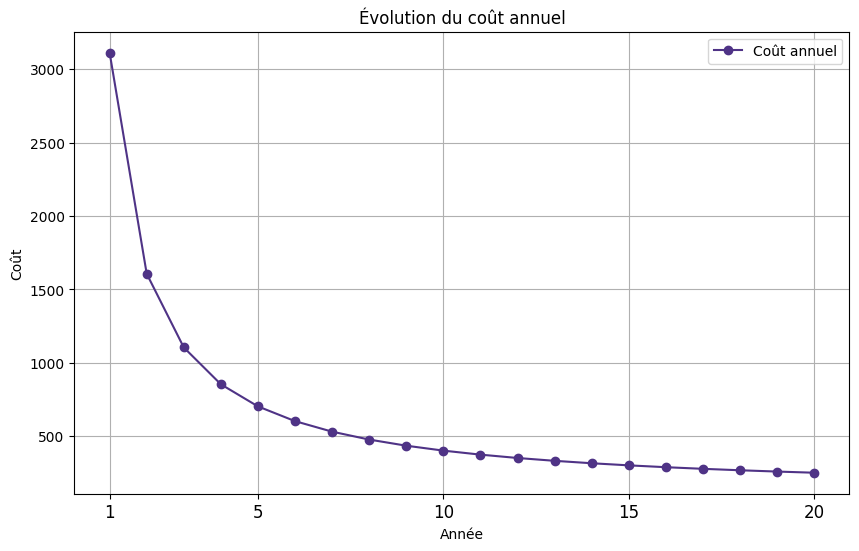

In [17]:
import matplotlib.pyplot as plt
import numpy as np
# Réponse

def CMF(X, P, T, M, m, year):

    cost = (X + 12 * year * (P * T + m) + M) / year

    return cost


X, P, T, M, m = 3000, 10, 0.8, 10, 0.5
tab_year = np.arange(1, 21, 1)
tab_cost = [CMF(X, P, T, M, m, tab_year[i]) for i in range(len(tab_year))]
line_color = "#4f3386"

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(tab_year, tab_cost, marker='o', linestyle='-', color=line_color, label='Coût annuel')

# Ajout des titres et labels
plt.title('Évolution du coût annuel')
plt.xlabel('Année')
plt.ylabel('Coût')

# Ajout des graduations tous les 5 ans
plt.xticks([1, 5, 10, 15, 20], fontsize=12)

# Ajout de la grille
plt.grid(True)

# Ajout de la légende
plt.legend()

# Affichage du graphique
plt.show()

Nous prenons désormais l'hypothèse que la machine outil vieillit, et donc qu'elle consomme de plus en plus de puissance. La puissance suit désormais la loi : P(a) = (P0 + exp(0.5*a))

1.3. Recalculez le CMF, puis tracer la nouvelle courbe obtenue, et comparez la aux résultats précédents.

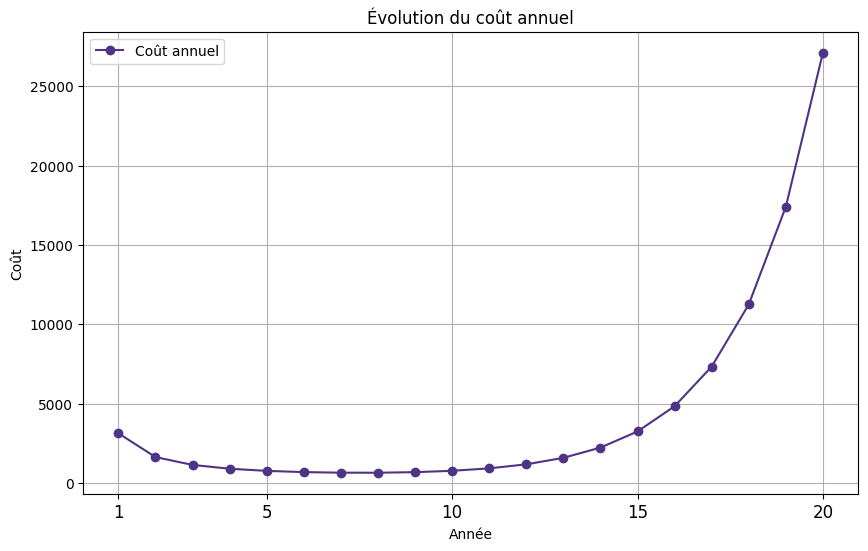

In [22]:
# réponse
def new_CMF(X, P, T, M, m, year, coef=0.5):

    puissance_cost_list = [12 * (P + np.exp(coef * (year))) * T for year in range(1, year + 1)]
    cost_puissance = np.sum(puissance_cost_list)
    cost = (X + 12 * year * m + cost_puissance + M) / year

    return cost

tab_cost = [new_CMF(X, P, T, M, m, tab_year[i]) for i in range(len(tab_year))]

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(tab_year, tab_cost, marker='o', linestyle='-', color=line_color, label='Coût annuel')

# Ajout des titres et labels
plt.title('Évolution du coût annuel')
plt.xlabel('Année')
plt.ylabel('Coût')

# Ajout des graduations tous les 5 ans
plt.xticks([1, 5, 10, 15, 20], fontsize=12)

# Ajout de la grille
plt.grid(True)

# Ajout de la légende
plt.legend()

# Affichage du graphique
plt.show()

Votre machine casse au bout de 15 ans. On fait l'hypothèse que le fabricant accepte de la racheter pour la transformer en pièces détachées pour 200€, ou qu'il facturera la maintenance "au minimum" pour réparation 250€. On considère que la maintenance répare "au minimum", c'est-à-dire que la machine reste au même stade de vieillissement que si elle n'avait pas cassé. On précise que le coût d'achat et/ou le coût de maintenance est considéré l'année de l'achat/maintenance.

1.4. Est-il judicieux de la remplacer ? Commentez.

In [ ]:
# Réponse 
"Oui il faut la remplacer, à partir de l'année 15 on va passer au dessus en coût moyen annuel que si on s'arrêtait à n_années = 15"


1.5. A partir de quelle année il est plus rentable de changer de machine ?

# 2. Stratégies de maintenance
Vous disposez de machines outils, achetées à différents moments. Chaque machine casse avec une probabilité qui suit une loi de Weibull (https://fr.wikipedia.org/wiki/Loi_de_Weibull). Quand la maintenance doit arriver, votre machine est indisponible, ce qui vous crée des pertes de 280€.

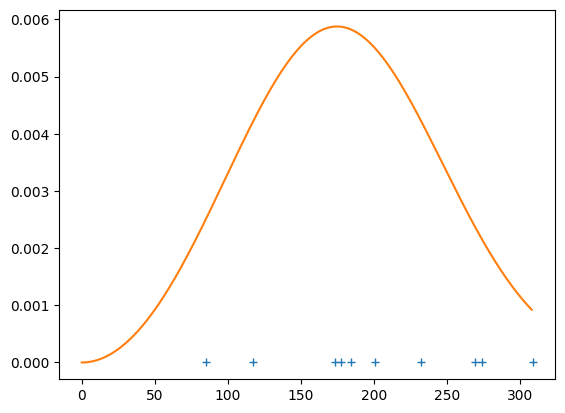

In [23]:
# Exécutez cette cellule
import matplotlib.pyplot as plt
import numpy as np
k = 3
lambda_w = 200
from scipy.stats import weibull_min
equipement_life = weibull_min.rvs(k, loc=0, scale=lambda_w, size=10)
plt.plot(equipement_life, np.zeros(10), '+')
d = np.arange(0, np.max(equipement_life))
survival = (k/lambda_w) * np.power((d/lambda_w),(k-1))*np.exp(-np.power((d/lambda_w), k))
plt.plot(d, survival)

2.1. Simulez le coût d'une stratégie de maintenance corrective sur 365 jours.

In [32]:
# Réponse
cost_per_failure = 280
num_days = 365
num_machines = 1000
equipement_life = weibull_min.rvs(k, loc=0, scale=lambda_w, size=num_machines)
failures = 0

for day in range(num_days):
    for i in range(num_machines):
        if equipement_life[i] <= day:
            failures += 1
            equipement_life[i] = weibull_min.rvs(k, loc=0, scale=lambda_w) + day

total_cost_per_machine = failures * cost_per_failure / num_machines

print(f"Coût total de la maintenance corrective sur {num_days} jours par machine : {total_cost_per_machine}€")

Coût total de la maintenance corrective sur 365 jours par machine : 448.56€


L'un des techniciens vous propose de mettre en place une maintenance préventive. En effet, si vous prévenez le constructeur en avance, il ne vous en coûtera que 65 €, car la réparation aura lieu la nuit.

2.2. Quelle est la période qui vous paraît le plus approprié ? Faites des simulations.

Intervalle optimal de maintenance préventive : 100 jours
Coût total de la maintenance préventive pour cet intervalle par machine : 378.665€


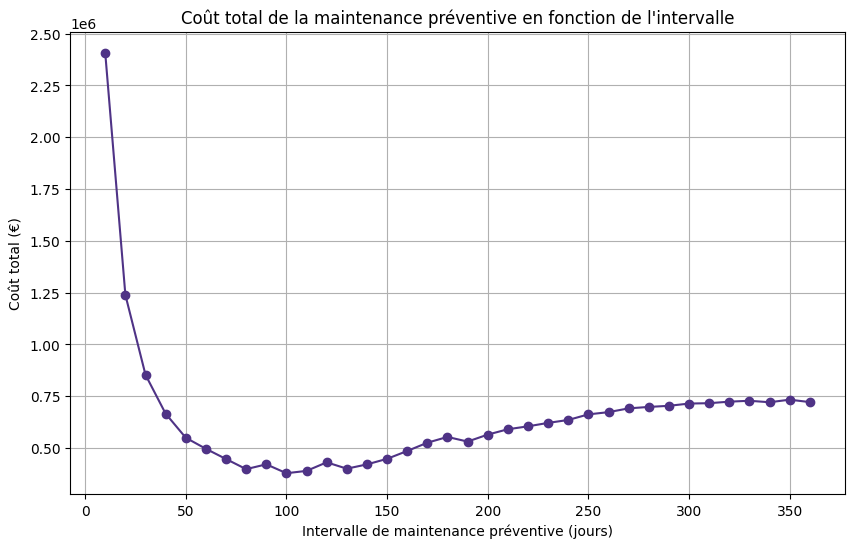

In [46]:
# Réponse

k = 3
lambda_w = 200
cost_per_failure = 280
cost_per_preventive = 65
num_days = 365
num_machines = 1000


def simulate_preventive_maintenance(interval):
    total_cost = 0
    for _ in range(num_machines):
        day = 0
        while day < num_days:
            life = weibull_min.rvs(k, loc=0, scale=lambda_w)
            while life <= interval and day < num_days:
                total_cost += cost_per_failure
                day += life
                life = weibull_min.rvs(k, loc=0, scale=lambda_w)
            if day < num_days:
                total_cost += cost_per_preventive
                day += interval
    return total_cost

intervals = range(10, 365, 10)
costs = [simulate_preventive_maintenance(interval) for interval in intervals]

optimal_interval = intervals[np.argmin(costs)]
optimal_cost = min(costs)

print(f"Intervalle optimal de maintenance préventive : {optimal_interval} jours")
print(f"Coût total de la maintenance préventive pour cet intervalle par machine : {optimal_cost / num_machines}€")

plt.figure(figsize=(10, 6))
plt.plot(intervals, costs, marker='o', linestyle='-', color=line_color)
plt.title('Coût total de la maintenance préventive en fonction de l\'intervalle')
plt.xlabel('Intervalle de maintenance préventive (jours)')
plt.ylabel('Coût total (€)')
plt.grid(True)
plt.show()

Un capteur vous permet de savoir la veille de la casse que la machine va casser, et ce, avec une probabilité de 0.9. 

2.3. Sachant que le capteur coûte 25€, qu'il a un coût de fonctionnement de 0.05€ par jour, , et que la maintenance vous coutera toujours 65€, est-il pertinent de passer à une maintenance prédictive ?

In [48]:
# Réponse 
k = 3
lambda_w = 200
cost_per_failure = 280
cost_per_preventive = 65
cost_per_predictive = 65
cost_sensor = 25
cost_sensor_per_day = 0.05
detection_probability = 0.9
num_days = 365
num_machines = 10

average_cost_preventive = 378.665

def simulate_predictive_maintenance():
    total_cost = 0
    for _ in range(num_machines):
        day = 0
        while day < num_days:
            life = weibull_min.rvs(k, loc=0, scale=lambda_w)
            while life <= num_days - day:
                if np.random.rand() < detection_probability:
                    total_cost += cost_per_predictive
                else:
                    total_cost += cost_per_failure
                day += life
                life = weibull_min.rvs(k, loc=0, scale=lambda_w)
            day += life
    total_cost += num_days * cost_sensor_per_day * num_machines
    total_cost += cost_sensor * num_machines
    return total_cost

cost_predictive = simulate_predictive_maintenance()

print(f"Coût moyen de perte par machine de la maintenance prédictive : {cost_predictive / num_machines}€")
if cost_predictive < average_cost_preventive * num_machines:
    print("Il est pertinent de passer à une maintenance prédictive.")
else:
    print("Il n'est pas pertinent de passer à une maintenance prédictive.")

Coût moyen de perte par machine de la maintenance prédictive : 153.75€
Il est pertinent de passer à une maintenance prédictive.


Vos machines sont désormais chaînées avec une seconde machine-outil.
Celle-ci suit une loi de Weibull différente. Sa maintenance préventive coûte 16€ (celle de la 1ère toujours 65€). Le coût de sa maintenance corrective sera de 720€.

2.4. En gardant toutes les autres hypothèses, comment proposez-vous d'adapter la stratégie de maintenance ? (faites l'hypothèse simplificatrice selon laquelle les maintenances sont simultanées, quand une machine tombe en panne, on répare les deux au coût de la maintenance corrective).

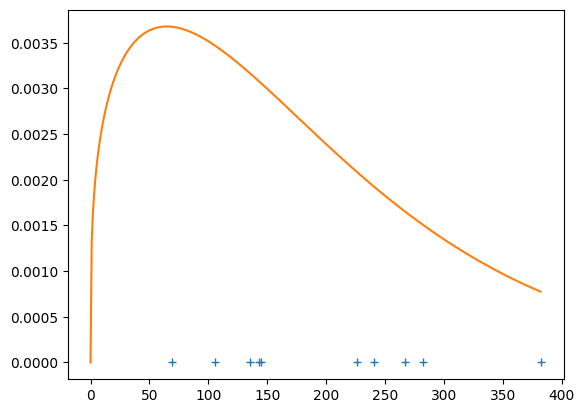

In [49]:
from scipy.stats import weibull_min
k2 = 1.3
lambda2_w = 200
equipement_life = weibull_min.rvs(k2, loc=0, scale=lambda2_w, size=10)
plt.plot(equipement_life, np.zeros(10), '+')
d = np.arange(0, np.max(equipement_life))
survival = (k2/lambda2_w) * np.power((d/lambda2_w),(k2-1))*np.exp(-np.power((d/lambda2_w), k2))
plt.plot(d, survival)

In [ ]:
# Réponse
cost_per_failure2 = 720
cost_per_preventive2 = 16

cost_sensor = 25
cost_sensor_per_day = 0.05
detection_probability = 0.9

num_days = 365
num_machines = 10

def simulate_predictive_maintenance():
    total_cost = 0
    for _ in range(num_machines):
        day = 0
        while day < num_days:
            life1 = weibull_min.rvs(k1, loc=0, scale=lambda_w1)
            life2 = weibull_min.rvs(k2, loc=0, scale=lambda_w2)
            life = min(life1, life2)
            while life <= num_days - day:
                if np.random.rand() < detection_probability:
                    total_cost += cost_per_preventive1 + cost_per_preventive2
                else:
                    total_cost += cost_per_failure1 + cost_per_failure2
                day += life
                life1 = weibull_min.rvs(k1, loc=0, scale=lambda_w1)
                life2 = weibull_min.rvs(k2, loc=0, scale=lambda_w2)
                life = min(life1, life2)
            day += life
    total_cost += num_days * cost_sensor_per_day * num_machines
    total_cost += cost_sensor * num_machines
    return total_cost

# Simuler le coût de la maintenance prédictive
cost_predictive = simulate_predictive_maintenance()

# Coût moyen de perte par machine pour la maintenance préventive
average_cost_preventive1 = 378
average_cost_preventive2 = 16 * (num_days // 30)  # Assuming preventive maintenance every 30 days
average_cost_preventive_total = average_cost_preventive1 + average_cost_preventive2

print(f"Coût total de la maintenance prédictive : {cost_predictive}€")
print(f"Coût moyen de perte par machine pour la maintenance préventive : {average_cost_preventive_total * num_machines}€")

if cost_predictive < average_cost_preventive_total * num_machines:
    print("Il est pertinent de passer à une maintenance prédictive.")
else:
    print("Il n'est pas pertinent de passer à une maintenance prédictive.")